# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.415617e+01     1.490916e+01
 * time: 0.0027208328247070312
     1     6.368359e+01     8.527882e+00
 * time: 0.008311986923217773
     2     5.757055e+01     1.192862e+01
 * time: 0.021392822265625
     3     4.183981e+01     8.535354e+00
 * time: 0.03900790214538574
     4     3.173002e+01     7.826291e+00
 * time: 0.05704689025878906
     5     2.654503e+01     6.562162e+00
 * time: 0.07247400283813477
     6     1.265990e+01     2.675006e+00
 * time: 0.08829092979431152
     7     1.198835e+01     5.116458e+00
 * time: 0.09879684448242188
     8     9.784024e+00     3.271114e+00
 * time: 0.1670818328857422
     9     9.198714e+00     2.904779e+00
 * time: 0.17964696884155273
    10     8.885398e+00     4.762113e+00
 * time: 0.1900639533996582
    11     8.000830e+00     2.286100e+00
 * time: 0.20285892486572266
    12     7.227707e+00     2.799584e+00
 * time: 0.21320295333862305
    13     6.750006e+00     3.072767e+00
 * time: 

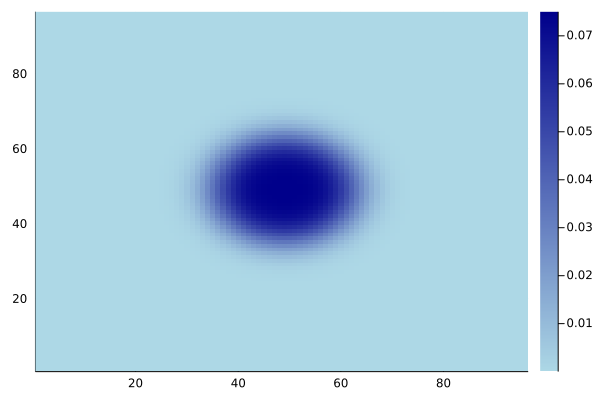

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)

# Parameters
Ecut = 50
n_electrons = 1
β = 5

terms = [Kinetic(2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
display(heatmap(scfres.ρ[:, :, 1, 1], c=:blues))